# Intuition for Imbalanced Data

A challenge for beginners working with imbalanced classification problems is what a specific skewed class distribution means. For example, what is the difference and implication for a 1:10 vs. a 1:100 class ratio?

The make_classification() scikit-learn function can be used to define a synthetic dataset with a desired class imbalance. The “weights” argument specifies the ratio of examples in the negative class, e.g. [0.99, 0.01] means that 99 percent of the examples will belong to the majority class, and the remaining 1 percent will belong to the minority class.

Once defined, we can summarize the class distribution using a Counter object to get an idea of exactly how many examples belong to each class.

We can also create a scatter plot of the dataset because there are only two input variables. The dots can then be colored by each class. This plot provides a visual intuition for what exactly a 99 percent vs. 1 percent majority/minority class imbalance looks like in practice.



Counter({0: 850, 1: 150})


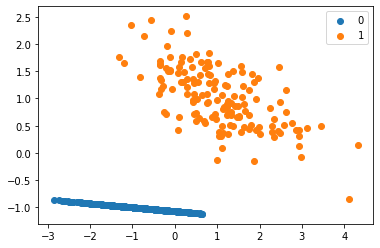

In [1]:
# plot imbalanced classification problem
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.80, 0.10], flip_y=0)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Evaluate Imbalanced Classification Models
Prediction accuracy is the most common metric for classification tasks, although it is inappropriate and potentially dangerously misleading when used on imbalanced classification tasks.

The reason for this is because if 98 percent of the data belongs to the negative class, you can achieve 98 percent accuracy on average by simply predicting the negative class all the time, achieving a score that naively looks good, but in practice has no skill.

Instead, alternate performance metrics must be adopted.

Popular alternatives are the precision and recall scores that allow the performance of the model to be considered by focusing on the minority class, called the positive class.

Precision calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. Maximizing the precision will minimize the false positives.

    Precision = TruePositives / (TruePositives + FalsePositives)

Recall predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. Maximizing recall will minimize false negatives.

    Recall = TruePositives / (TruePositives + FalseNegatives)

The performance of a model can be summarized by a single score that averages both the precision and the recall, called the F-Measure. Maximizing the F-Measure will maximize both the precision and recall at the same time.

    F-measure = (2 * Precision * Recall) / (Precision + Recall)

The example below fits a logistic regression model on an imbalanced classification problem and calculates the accuracy, which can then be compared to the precision, recall, and F-measure.

In [2]:
# evaluate imbalanced classification model with different metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 1.000
Precision: 1.000
Recall: 0.960
F-measure: 0.980


# Undersampling the Majority Class 

A simple approach to using standard machine learning algorithms on an imbalanced dataset is to change the training dataset to have a more balanced class distribution.

This can be achieved by deleting examples from the majority class, referred to as “undersampling.” A possible downside is that examples from the majority class that are helpful during modeling may be deleted.

A fast and reliable approach is to randomly delete examples from the majority class to reduce the imbalance to a ratio that is less severe or even so that the classes are even.

The example below creates a synthetic imbalanced classification data, then uses RandomUnderSampler class to change the class distribution from 1:100 minority to majority classes to the less severe 1:2.

In [3]:
# example of undersampling the majority class
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

Counter({0: 9900, 1: 100})
Counter({0: 200, 1: 100})


# Oversampling the Minority Class

An alternative to deleting examples from the majority class is to add new examples from the minority class.

This can be achieved by simply duplicating examples in the minority class, but these examples do not add any new information. Instead, new examples from the minority can be synthesized using existing examples in the training dataset. These new examples will be “close” to existing examples in the feature space, but different in small but random ways.

The SMOTE algorithm is a popular approach for oversampling the minority class. This technique can be used to reduce the imbalance or to make the class distribution even.

The example below demonstrates using the SMOTE class provided by the imbalanced-learn library on a synthetic dataset. The initial class distribution is 1:100 and the minority class is oversampled to a 1:2 distribution.

In [4]:
# example of oversampling the minority class
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 4950})


# Combine Data Undersampling and Oversampling

Data undersampling will delete examples from the majority class, whereas data oversampling will add examples to the minority class. These two approaches can be combined and used on a single training dataset.

Given that there are so many different data sampling techniques to choose from, it can be confusing as to which methods to combine. Thankfully, there are common combinations that have been shown to work well in practice; some examples include:

    Random Undersampling with SMOTE oversampling.
    Tomek Links Undersampling with SMOTE oversampling.
    Edited Nearest Neighbors Undersampling with SMOTE oversampling.

These combinations can be applied manually to a given training dataset by first applying one sampling algorithm, then another. Thankfully, the imbalanced-learn library provides implementations of common combined data sampling techniques.

The example below demonstrates how to use the SMOTEENN that combines both SMOTE oversampling of the minority class and Edited Nearest Neighbors undersampling of the majority class.

In [5]:
# example of both undersampling and oversampling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = sample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9692, 1: 4757})


# Cost-Sensitive Algorithms

Most machine learning algorithms assume that all misclassification errors made by a model are equal. This is often not the case for imbalanced classification problems, where missing a positive or minority class case is worse than incorrectly classifying an example from the negative or majority class.

Cost-sensitive learning is a subfield of machine learning that takes the costs of prediction errors (and potentially other costs) into account when training a machine learning model. Many machine learning algorithms can be updated to be cost-sensitive, where the model is penalized for misclassification errors from one class more than the other, such as the minority class.

The scikit-learn library provides this capability for a range of algorithms via the class_weight attribute specified when defining the model. A weighting can be specified that is inversely proportional to the class distribution.

If the class distribution was 0.99 to 0.01 for the majority and minority classes, then the class_weight argument could be defined as a dictionary that defines a penalty of 0.01 for errors made for the majority class and a penalty of 0.99 for errors made with the minority class, e.g. {0:0.01, 1:0.99}.

This is a useful heuristic and can be configured automatically by setting the class_weight argument to the string ‘balanced‘.

The example below demonstrates how to define and fit a cost-sensitive logistic regression model on an imbalanced classification dataset.

In [6]:
# example of cost sensitive logistic regression for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('F-Measure: %.3f' % f1_score(testy, yhat))

F-Measure: 0.571
